In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import re
import urllib.request

In [2]:
page = urllib.request.urlopen("https://en.wikipedia.org/wiki/Harvard_University").read()
soup = BeautifulSoup(page,'lxml')

In [3]:
#classlist = soup.find_all('table')
classlist = [t['class'] for t in soup.find_all('table') if t.get('class')]
print(classlist)

[['infobox', 'vcard'], ['toccolours'], ['plainlinks', 'metadata', 'ambox', 'mbox-small-left', 'ambox-content'], ['infobox'], ['wikitable'], ['nowraplinks', 'collapsible', 'collapsed', 'navbox-inner'], ['nowraplinks', 'navbox-subgroup'], ['nowraplinks', 'navbox-subgroup'], ['nowraplinks', 'collapsible', 'collapsed', 'navbox-inner'], ['nowraplinks', 'collapsible', 'autocollapse', 'navbox-inner'], ['nowraplinks', 'collapsible', 'autocollapse', 'navbox-inner'], ['nowraplinks', 'collapsible', 'autocollapse', 'navbox-inner'], ['nowraplinks', 'collapsible', 'autocollapse', 'navbox-inner'], ['nowraplinks', 'collapsible', 'autocollapse', 'navbox-inner'], ['nowraplinks', 'collapsible', 'autocollapse', 'navbox-inner'], ['nowraplinks', 'hlist', 'collapsible', 'autocollapse', 'navbox-inner'], ['nowraplinks', 'collapsible', 'autocollapse', 'navbox-inner'], ['nowraplinks', 'collapsible', 'autocollapse', 'navbox-inner'], ['nowraplinks', 'hlist', 'collapsible', 'autocollapse', 'navbox-inner'], ['nowrap

In [4]:
tabletext = str(soup.find(class_='wikitable'))
rows = [r for r in soup.find(class_='wikitable').find_all('tr')]
print(rows[0])

<tr>
<th></th>
<th>Undergraduate</th>
<th>Graduate<br/>
and Professional</th>
<th>U.S. Census</th>
</tr>


In [5]:
remove_n = lambda s:s.replace('\n',' ')
columns = [remove_n(c.get_text()) for c in rows[0].find_all('th') if c.get_text()]
print(columns)

['Undergraduate', 'Graduate and Professional', 'U.S. Census']


In [6]:
indexes= [r.find('th').get_text() for r in rows[1:]]
print(indexes)

['Asian/Pacific Islander', 'Black/Non-Hispanic', 'Hispanics of any race', 'White/non-Hispanic', 'Mixed Race/Other', 'International students']


In [7]:
percentage = [p.get_text() for r in rows[1:] for p in r.find_all('td')]
print(percentage)

['17%', '11%', '5%', '6%', '4%', '12%', '9%', '5%', '16%', '46%', '43%', '64%', '10%', '8%', '9%', '11%', '27%', 'N/A']


In [8]:
to_num = lambda s : s[-1] == '%' and int(s[:-1]) or None
numbers = [to_num(s) for s in percentage]

In [9]:
stacked_values = np.asarray(numbers).reshape(6,3)
#stacked_values = list(zip(*[numbers[i::3] for i in range(len(columns))]))

In [10]:
df = pd.DataFrame(stacked_values, columns=columns, index=indexes)
#data_dict = [{col:val for col,val in list(zip(columns,col_values))} for col_values in stacked_values]
#df = pd.DataFrame(data_dict,index=indexes)

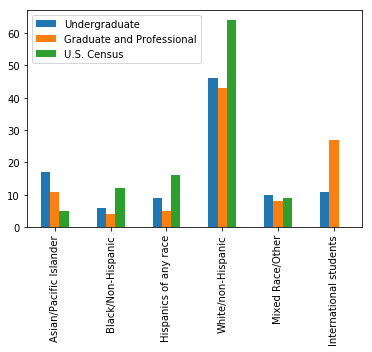

In [11]:
df.plot(kind='bar')